In [26]:
import numpy as np
import matplotlib.pylab as plt
from collections import defaultdict

In [3]:
%matplotlib inline

In [80]:
in_f = '/orions4-zfs/projects/optas/DATA/OUT/iclr/evaluations/l_wgan_gp_meta_param_search/lambda_search_512_1024_v1.txt'

In [81]:
measurements = defaultdict(list)
with open(in_f) as fin:
    for line in fin:
        if line.startswith('#'):
            continue        
        l = line.rstrip()
        if l.isdigit():
            current_lambda = int(l)
        elif l.startswith('NB-GAN'):
            _, epoch, train_jsd, test_jsd = l.split()            
            measurements[current_lambda].append((int(epoch), float(train_jsd), float(test_jsd)))

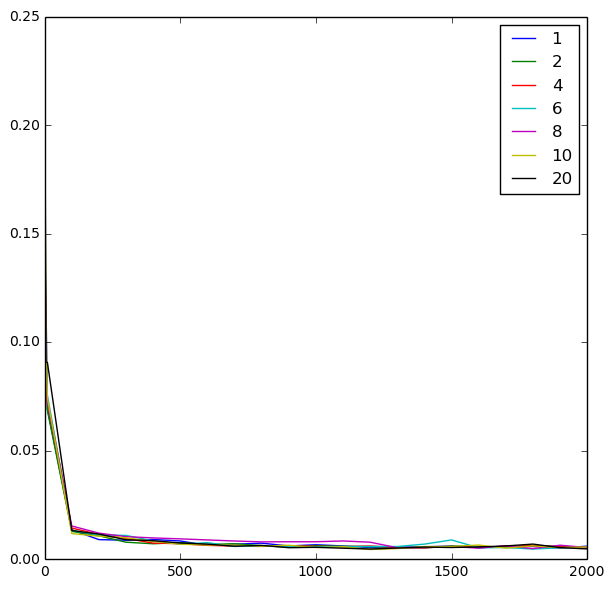

In [82]:
fig1 = plt.figure(figsize=(7, 7))

for key in sorted(measurements.keys()):
    epochs = [e[0] for e in measurements[key]]
    jsd_tr = [e[1] for e in measurements[key]]
    jsd_te = [e[2] for e in measurements[key]]
    plt.plot(epochs, jsd_tr)
plt.legend(sorted(measurements.keys()))

In [86]:
for key in sorted(measurements.keys()):
    epochs = np.array([e[0] for e in measurements[key]])
    jsd_tr = np.array([e[1] for e in measurements[key]])
    jsd_te = np.array([e[2] for e in measurements[key]])
    mtr = np.argmin(jsd_tr)
    mte = np.argmin(jsd_te)
    print key, 'train_best:', epochs[mtr], jsd_tr[mtr], jsd_te[mtr]
    print key, 'test_best:', epochs[mte], jsd_te[mte], jsd_tr[mte]

1 train_best: 1900 0.00523079765501 0.00957899188471
1 test_best: 1200 0.00887143922144 0.0054633178774
2 train_best: 1400 0.00530721795768 0.00948249816909
2 test_best: 2000 0.00937936523864 0.00547317041456
4 train_best: 2000 0.0051680956281 0.00933955880486
4 test_best: 1700 0.00923646440897 0.00591866142043
6 train_best: 1800 0.00479514223609 0.00888294708664
6 test_best: 1800 0.00888294708664 0.00479514223609
8 train_best: 1800 0.00500107185198 0.00904462675702
8 test_best: 1300 0.00895579874465 0.00537544690438
10 train_best: 1200 0.00458746272396 0.00885413153011
10 test_best: 1700 0.0088278480925 0.00521594344726
20 train_best: 1200 0.00480236220501 0.00877724599808
20 test_best: 2000 0.0084984476586 0.00484562747463
